To start with, we will import the necessary libraries and load the sales dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sales data into a pandas DataFrame
sales_data = pd.read_csv('C:/Users/ilham/Desktop/ITIM5113 - Big Data/sales_data_na.csv')




Check the size of the dataset

In [26]:
# Check the size of the dataset
print("Shape of the dataset:", sales_data.shape)

Shape of the dataset: (113037, 18)


Visualize the data before cleaning process

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  11/26/2013   26  November  2013          19.0     Youth (<25)   
1  11/26/2015   26       NaN  2015          19.0             NaN   
2   3/23/2014   23     March  2014           NaN  Adults (35-64)   
3   3/23/2016   23     March  2016          49.0  Adults (35-64)   
4   5/15/2014   15       May  2014          47.0  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia               NaN      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  \
0                  NaN       

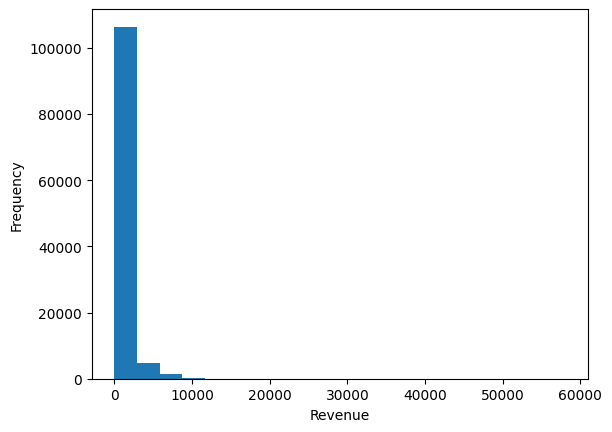

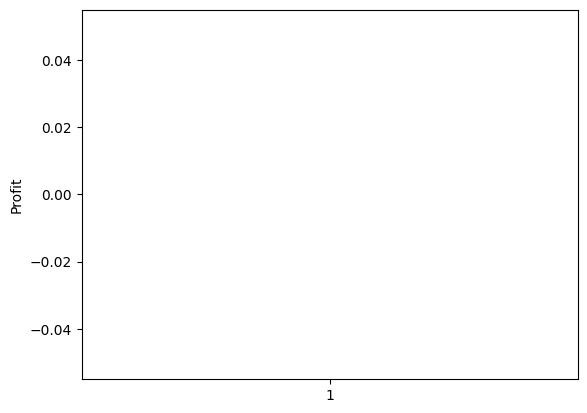

In [2]:


# Display the first 5 rows of the DataFrame
print(sales_data.head())

# Display summary statistics of the DataFrame
print(sales_data.describe())


# Plot a histogram of the 'Sales' column
plt.hist(sales_data['Revenue'], bins=20)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot of the 'Profit' column
plt.boxplot(sales_data['Profit'])
plt.ylabel('Profit')
plt.show()

To check for inconsistent column names in a pandas DataFrame

In [3]:
# Print the column names of the DataFrame
print(sales_data.columns)

# Rename any inconsistent or misspelled column names
sales_data = sales_data.rename(columns={'revenu': 'revenue'})

# Verify that all column names are consistent and properly spelled
print(sales_data.columns)

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')
Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


To check for missing data in a pandas DataFrame, we can use the isnull() method to create a DataFrame of boolean values indicating whether each element in the original DataFrame is missing (True) or not missing (False)

In [4]:
# Check for missing data in the DataFrame
missing_data = sales_data.isnull()
print(missing_data.sum())

Date                0
Day                 0
Month               1
Year                0
Customer_Age        1
Age_Group           1
Customer_Gender     0
Country             0
State               1
Product_Category    0
Sub_Category        0
Product             1
Order_Quantity      0
Unit_Cost           3
Unit_Price          1
Profit              3
Cost                1
Revenue             5
dtype: int64


Use the isnull method to identify missing data in the dataset and use techniques such as imputation or deletion to handle missing data:

In [5]:
# Replace missing values with the median
sales_data.fillna(sales_data.median(), inplace=True)

# Drop rows with missing values
sales_data.dropna(inplace=True)



C:\Users\ilham\AppData\Local\Temp\ipykernel_12308\32405820.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.fillna(sales_data.median(), inplace=True)


Check again the missing data. We can then use the sum() method to count the number of missing values in each column

In [6]:
# Check for missing data in the DataFrame
missing_data = sales_data.isnull()
print(missing_data.sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


To check for outliers in the sales_data DataFrame

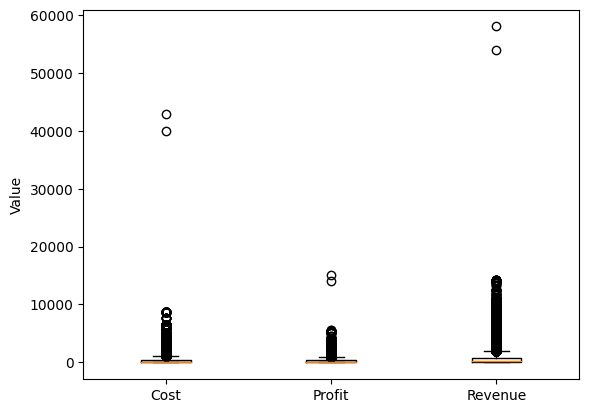

In [7]:
import matplotlib.pyplot as plt

# Plot box plots for 'Cost', 'Profit', and 'revenue' columns
plt.boxplot([sales_data['Cost'], sales_data['Profit'], sales_data['Revenue']])
plt.xticks([1, 2, 3], ['Cost', 'Profit', 'Revenue'])
plt.ylabel('Value')
plt.show()

To check for duplicate rows in a pandas DataFrame, we can use the duplicated() method. This method returns a boolean Series indicating whether each row is a duplicate of a previous row

In [8]:

# Check for duplicate rows
duplicate_rows = sales_data.duplicated()

# Print the number of duplicate rows
print('Number of duplicate rows:', duplicate_rows.sum())

Number of duplicate rows: 1001


This method removes duplicate rows based on a subset of columns, or based on all columns by default

In [9]:
# Drop duplicate rows based on all columns
sales_data = sales_data.drop_duplicates()

# Print the number of rows and columns in the cleaned DataFrame
print('Number of rows and columns after cleaning:', sales_data.shape)

Number of rows and columns after cleaning: (112033, 18)


Let's check the column names first. We can print the column names using the following code

In [10]:
print(sales_data.columns)


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


To check untidy data

In [11]:
for col in sales_data.columns:
    unique_vals = pd.Series(sales_data[col].unique())
    if unique_vals.size == sales_data[col].size:
        print(f"Column '{col}' has a unique value for each row.")
    else:
        print(f"Column '{col}' has {unique_vals.size} unique value(s) out of {sales_data[col].size} row(s).")

Column 'Date' has 1884 unique value(s) out of 112033 row(s).
Column 'Day' has 31 unique value(s) out of 112033 row(s).
Column 'Month' has 16 unique value(s) out of 112033 row(s).
Column 'Year' has 6 unique value(s) out of 112033 row(s).
Column 'Customer_Age' has 70 unique value(s) out of 112033 row(s).
Column 'Age_Group' has 4 unique value(s) out of 112033 row(s).
Column 'Customer_Gender' has 2 unique value(s) out of 112033 row(s).
Column 'Country' has 6 unique value(s) out of 112033 row(s).
Column 'State' has 53 unique value(s) out of 112033 row(s).
Column 'Product_Category' has 3 unique value(s) out of 112033 row(s).
Column 'Sub_Category' has 17 unique value(s) out of 112033 row(s).
Column 'Product' has 130 unique value(s) out of 112033 row(s).
Column 'Order_Quantity' has 33 unique value(s) out of 112033 row(s).
Column 'Unit_Cost' has 35 unique value(s) out of 112033 row(s).
Column 'Unit_Price' has 36 unique value(s) out of 112033 row(s).
Column 'Profit' has 1256 unique value(s) out 

To process the column

In [18]:
# Convert OrderDate to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Create new columns for OrderYear, OrderMonth, and OrderDay
sales_data['OrderYear'] = sales_data['Date'].dt.year
sales_data['OrderMonth'] = sales_data['Date'].dt.month
sales_data['OrderDay'] = sales_data['Date'].dt.day

# Combine Country and City columns into a single Location column
sales_data['Location'] = sales_data['Country'] + ', ' + sales_data['State']

# Calculate the profit margin
sales_data['ProfitMargin'] = (sales_data['Revenue'] - sales_data['Cost']) / sales_data['Revenue']

# Drop unnecessary columns
sales_data.drop(['Date', 'Country', 'State', 'Revenue', 'Cost'], axis=1, inplace=True)

Print again to see the reflection to the columns 

In [25]:
print(sales_data.columns)

Index(['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender',
       'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity',
       'Unit_Cost', 'Unit_Price', 'Profit', 'OrderYear', 'OrderMonth',
       'OrderDay', 'Location', 'ProfitMargin'],
      dtype='object')


Visualize the data using various plots to gain a better understanding of the dataset. Here are some examples:

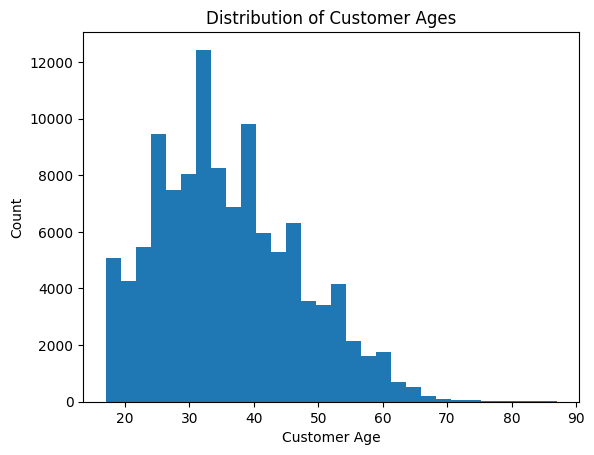

In [19]:
# Plot histogram of customer ages
plt.hist(sales_data['Customer_Age'], bins=30)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.show()

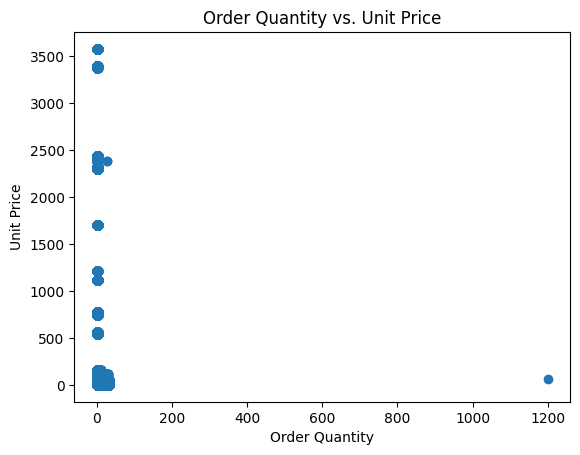

In [24]:
# Plot scatter plot of Order Quantity vs. Unit Price
plt.scatter(sales_data['Order_Quantity'], sales_data['Unit_Price'])
plt.xlabel('Order Quantity')
plt.ylabel('Unit Price')
plt.title('Order Quantity vs. Unit Price')
plt.show()

